# MNIST Dataset 

In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# All imports used for mnist notebook
# Adapted from https://docs.python.org/3/library/gzip.html
import gzip
with gzip.open('Data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    img_content = f.read()




In [48]:
import gzip
with gzip.open('Data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    label_content = f.read()

In [49]:
file_content[0:10]

b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00"

In [50]:
# Used for finding the type of the content
type(file_content)

bytes

# Byte Conversion

In [51]:
int.from_bytes(file_content[0:4], byteorder='big')

2051

In [52]:
int.from_bytes(label_content[0:4], byteorder='big')

2049

# Neural Network

In [53]:
# Import keras.
import keras as kr

# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=600, activation='linear', input_dim=784))
model.add(kr.layers.Dense(units=400, activation='relu'))
# Add a three neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ModuleNotFoundError: No module named 'keras'

# Train image and label

In [63]:
import gzip

with gzip.open('Data/train-images-idx3-ubyte.gz', 'rb') as f:
    tImage = f.read()
    
with gzip.open('Data/train-labels-idx1-ubyte.gz', 'rb') as f:
    tLabel = f.read()
    

In [64]:
int.from_bytes(tImage[4:8], byteorder='big')

60000

# Image

In [72]:
#Array size - 768
%matplotlib inline

#image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)
#plt.imshow(image, cmap='gray')

imageArray = np.frombuffer(image, dtype = np.uint8, offset = 16)
imageArray = imageArray.reshape(10000, 28, 28)
plt.imshow(imageArray[7], cmap="binary")

ValueError: cannot reshape array of size 768 into shape (10000,28,28)

In [73]:
labelArray = np.frombuffer(label_content, dtype = np.uint8, offset = 8)
#plt.imshow(image[84], cmap="binary")
print(labelArray[0])

7


# Image Saving

TypeError: Invalid dimensions for image data

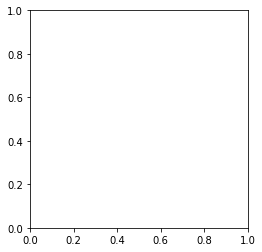

In [75]:
for i in range(5):
    plt.imshow(parsed_img_array[i], cmap='binary')
    plt.savefig('Images/t10k-id') + str(i+1) + '-' + str(labelArray[i])
    